<a href="https://colab.research.google.com/github/robinsingh2022/MSDS458/blob/main/Assignment%201/Assignment1MSDS458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ingest

In [ ]:

# Helper libraries
import datetime
from packaging import version
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


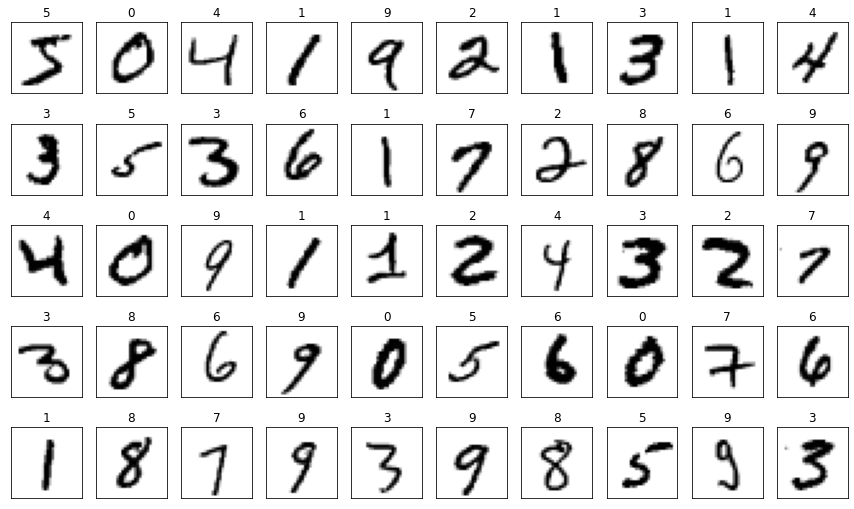

In [ ]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


##EDA (May Ignore)

In [ ]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[2020]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

In [ ]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [ ]:
print(set(x_train_reshaped[0]))


{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [ ]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [ ]:
# Take a look at the first reshaped and normalized training image:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


##Best Model

In [ ]:
model = Sequential([
    Dense(input_shape=[784], units = 128, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


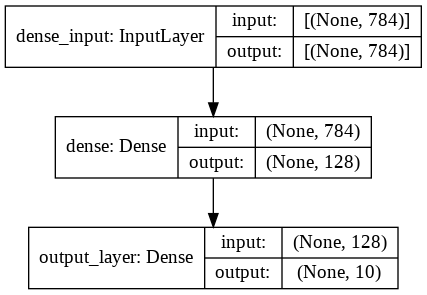

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.9201 - val_loss: 0.1574 - val_accuracy: 0.9549
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1311 - accuracy: 0.9608 - val_loss: 0.1177 - val_accuracy: 0.9661
Epoch 3/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0954 - accuracy: 0.9719 - val_loss: 0.1037 - val_accuracy: 0.9701
Epoch 4/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0760 - accuracy: 0.9789 - val_loss: 0.1051 - val_accuracy: 0.9711
Epoch 5/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0622 - accuracy: 0.9829 - val_loss: 0.1068 - val_accuracy: 0.9727
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.1098 - val_accuracy: 0.9724
Epoch 7/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9869 - val_loss: 0.1089 - val_ac

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1065 - accuracy: 0.9779
test set accuracy:  97.79000282287598


In [ ]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


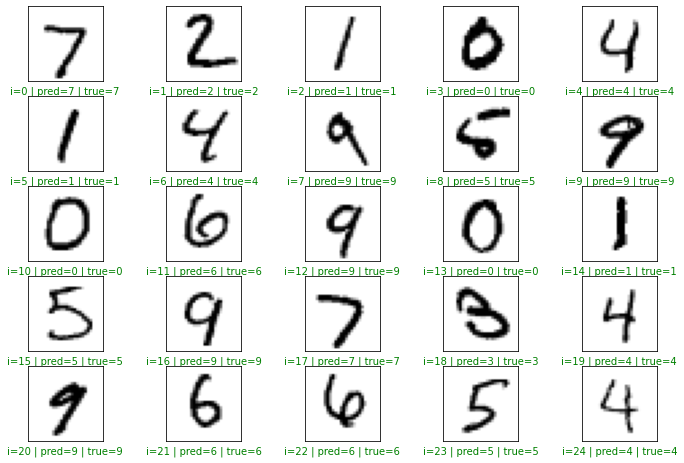

In [ ]:
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

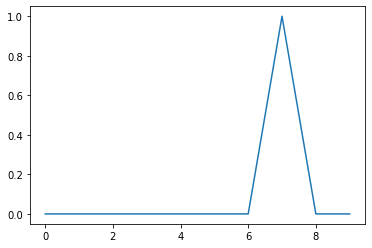

In [ ]:
index = 17

plt.plot(preds[index])
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
losses

[0.27704280614852905,
 0.13108877837657928,
 0.0953659638762474,
 0.07600956410169601,
 0.06220385059714317,
 0.05308832973241806,
 0.04615495726466179,
 0.0392952486872673,
 0.03479943424463272,
 0.03110656701028347,
 0.027383804321289062,
 0.024353040382266045,
 0.02121768891811371]

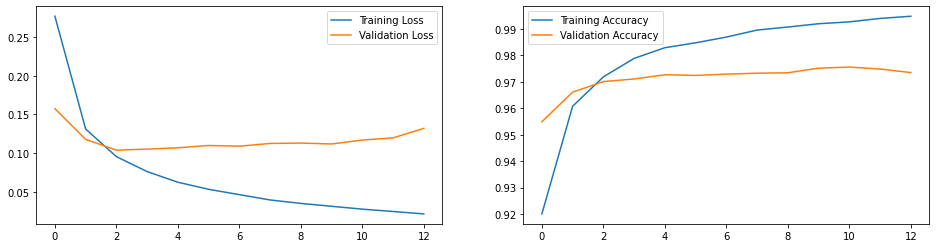

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(x_test_norm), axis=-1)
pred_classes

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    0,    1,    1,    2,    2,    1,    3],
       [   0, 1126,    3,    0,    0,    1,    2,    0,    3,    0],
       [   3,    1,  998,    8,    1,    0,    3,    6,   12,    0],
       [   0,    0,    3,  984,    1,    5,    0,    5,    6,    6],
       [   1,    1,    2,    1,  956,    1,    5,    2,    1,   12],
       [   3,    0,    0,    3,    1,  870,    5,    1,    5,    4],
       [   5,    2,    0,    1,    5,    3,  939,    0,    3,    0],
       [   1,    3,    9,    3,    0,    1,    0,  996,    4,   11],
       [   1,    1,    2,    4,    2,    1,    1,    1,  955,    6],
       [   2,    3,    0,    2,    9,    3,    0,    2,    2,  986]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
3,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.98%,0.00%,0.00%,0.00%,0.00%,0.02%
5,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%
7,0.00%,0.00%,0.00%,0.85%,0.00%,0.00%,0.00%,0.00%,0.00%,99.15%
8,0.00%,0.00%,0.00%,0.00%,0.00%,57.39%,42.61%,0.00%,0.00%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%


In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 128)

In [ ]:
output_layer_activations.shape

(60000, 10)

In [ ]:
model.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>]

In [ ]:
hidden_layer_activation

array([[0.        , 0.        , 0.        , ..., 2.999337  , 0.        , 2.479529  ],
       [1.6333871 , 5.7275867 , 0.        , ..., 0.6429467 , 0.        , 0.        ],
       [3.7416341 , 3.2764406 , 0.        , ..., 0.        , 3.0352166 , 0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 5.015921  , 0.        , 2.2361689 ],
       [0.        , 4.748271  , 1.6060928 , ..., 0.05039817, 1.5982085 , 0.        ],
       [0.        , 0.9749873 , 0.6820344 , ..., 2.9268584 , 0.        , 0.5544573 ]], dtype=float32)

In [ ]:
output_layer_activations

array([[1.20042809e-21, 1.84871315e-15, 1.84353170e-13, ..., 2.42681960e-13, 4.73354675e-16, 6.34032285e-17],
       [1.00000000e+00, 5.34783717e-24, 4.11291623e-09, ..., 1.28248853e-11, 1.03109757e-16, 4.56917165e-13],
       [1.98292668e-23, 7.87617187e-24, 2.22809943e-12, ..., 1.17680225e-13, 1.75072737e-16, 4.69450451e-11],
       ...,
       [1.28985504e-19, 3.52640886e-16, 2.41160327e-21, ..., 6.57447180e-22, 7.00391915e-12, 6.07181465e-15],
       [1.06289644e-10, 4.54377689e-17, 4.15750377e-12, ..., 5.55186369e-16, 6.31541942e-16, 1.73015656e-19],
       [3.69751556e-11, 7.89691749e-12, 1.23086537e-08, ..., 2.35266980e-11, 9.99999881e-01, 1.67422527e-07]], dtype=float32)

In [ ]:
len(output_layer_activations)

60000

In [ ]:
len(hidden_layer_activation)

60000

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 20.229103088378906


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.     0.     0.     0.0005 0.     0.9995 0.     0.     0.     0.    ]
The sum of the probabilities is (approximately) 1.0


In [ ]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,128):
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.000,2.000,1.000,3.000,1.000,4.000,3.000,5.000,3.000,6.000,1.000
act_val_0,0.000,1.633,3.742,0.000,1.838,0.000,0.000,0.720,0.000,0.445,0.000,0.000,0.000,0.000,0.000
act_val_1,0.000,5.728,3.276,0.074,3.436,3.499,0.078,1.494,0.000,5.316,0.000,2.288,0.000,6.578,0.000
act_val_2,0.000,0.000,0.000,0.000,3.735,0.000,0.000,0.000,0.000,0.792,0.000,0.005,0.000,2.902,0.000
act_val_3,0.000,0.000,0.000,0.000,1.860,0.000,1.674,0.000,1.156,0.876,0.000,0.000,0.000,0.000,1.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
act_val_123,0.784,0.000,0.000,0.210,0.584,0.000,3.713,2.138,2.986,0.000,2.263,0.000,0.000,0.000,2.805
act_val_124,1.263,6.881,3.306,0.877,0.000,0.895,0.000,4.712,0.000,1.324,0.000,0.000,0.000,1.904,0.000
act_val_125,2.999,0.643,0.000,1.159,2.175,0.000,0.000,1.528,0.000,0.000,0.549,0.000,0.000,0.000,0.000
act_val_126,0.000,0.000,3.035,1.264,0.000,0.069,0.000,2.152,0.000,0.857,0.639,2.875,3.697,1.690,0.000


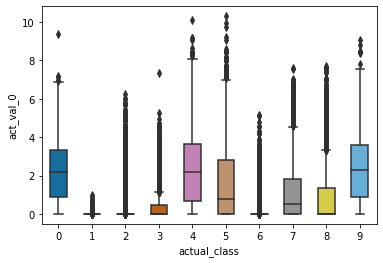

In [ ]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class',
                 data=activation_df[['act_val_0','actual_class']],
                 width=0.5,
                 palette="colorblind")

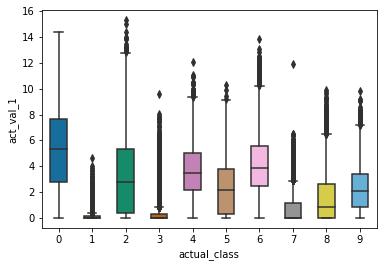

In [ ]:
bplot = sns.boxplot(y='act_val_1', x='actual_class',
                 data=activation_df[['act_val_1','actual_class']],
                 width=0.5,
                 palette="colorblind")

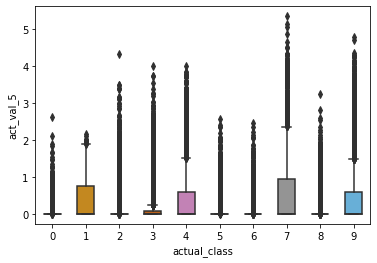

In [ ]:
bplot = sns.boxplot(y='act_val_5', x='actual_class',
                 data=activation_df[['act_val_5','actual_class']],
                 width=0.5,
                 palette="colorblind")

##More EDA (ignore)

In [ ]:
model = Sequential([
    Dense(input_shape=[784], units = 128, activation = tf.nn.relu),
    Dense(1,activation=tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 100,629
Trainable params: 100,629
Non-trainable params: 0
_________________________________________________________________


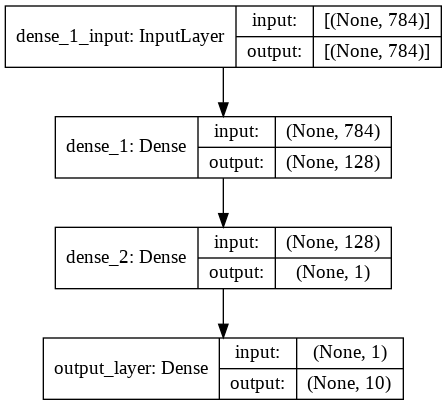

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9023 - accuracy: 0.2394 - val_loss: 1.7509 - val_accuracy: 0.3005
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 1.6569 - accuracy: 0.3341 - val_loss: 1.6071 - val_accuracy: 0.3669
Epoch 3/200
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5687 - accuracy: 0.3792 - val_loss: 1.5796 - val_accuracy: 0.3920
Epoch 4/200
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5207 - accuracy: 0.3929 - val_loss: 1.5292 - val_accuracy: 0.3908
Epoch 5/200
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4917 - accuracy: 0.4089 - val_loss: 1.5017 - val_accuracy: 0.4085
Epoch 6/200
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4470 - accuracy: 0.4353 - val_loss: 1.4478 - val_accuracy: 0.4552
Epoch 7/200
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3990 - accuracy: 0.4554 - val_loss: 1.4329 - val_ac

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 1.3988 - accuracy: 0.4934
test set accuracy:  49.34000074863434


In [ ]:
model = Sequential([
    Dense(input_shape=[784], units = 128, activation = tf.nn.relu),
    Dense(2,activation=tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 100,768
Trainable params: 100,768
Non-trainable params: 0
_________________________________________________________________


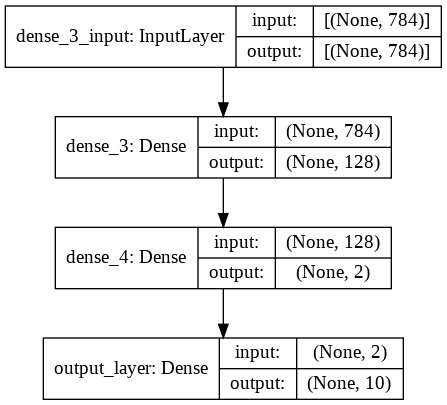

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 6s 3ms/step - loss: 1.5345 - accuracy: 0.4277 - val_loss: 1.1799 - val_accuracy: 0.6364
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9776 - accuracy: 0.6947 - val_loss: 0.8091 - val_accuracy: 0.7492
Epoch 3/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6951 - accuracy: 0.8006 - val_loss: 0.6574 - val_accuracy: 0.8092
Epoch 4/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5796 - accuracy: 0.8273 - val_loss: 0.5740 - val_accuracy: 0.8255
Epoch 5/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5187 - accuracy: 0.8357 - val_loss: 0.5386 - val_accuracy: 0.8321
Epoch 6/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4750 - accuracy: 0.8436 - val_loss: 0.5269 - val_accuracy: 0.8350
Epoch 7/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4473 - accuracy: 0.8477 - val_loss: 0.5199 - val_ac

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.5159 - accuracy: 0.8410
test set accuracy:  84.10000205039978


##Experiment 1

In [ ]:
model = Sequential([
    Dense(input_shape=[784], units = 1, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 785       
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


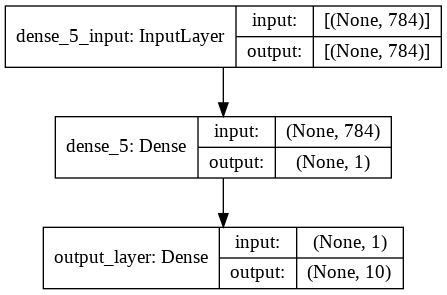

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0155 - accuracy: 0.2109 - val_loss: 1.8818 - val_accuracy: 0.2495
Epoch 2/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.8276 - accuracy: 0.2657 - val_loss: 1.7861 - val_accuracy: 0.2623
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7648 - accuracy: 0.2780 - val_loss: 1.7429 - val_accuracy: 0.2698
Epoch 4/200
1500/1500 [==============================] - 2s 2ms/step - loss: 1.7309 - accuracy: 0.2842 - val_loss: 1.7179 - val_accuracy: 0.2849
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7100 - accuracy: 0.2898 - val_loss: 1.6986 - val_accuracy: 0.2892
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6948 - accuracy: 0.2933 - val_loss: 1.6905 - val_accuracy: 0.2912
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6847 - accuracy: 0.2963 - val_loss: 1.6797 - val_ac

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 1.6311 - accuracy: 0.3482
test set accuracy:  34.81999933719635


In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 1)

In [ ]:
output_layer_activations.shape

(60000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 12.487813949584961


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.0853 0.0499 0.0977 0.2014 0.0032 0.1302 0.2153 0.0019 0.2146 0.0005]
The sum of the probabilities is (approximately) 1.0000001192092896


In [ ]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,1):
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.00,9.0,2.00,1.0,3.000,1.000,4.000,3.000,5.000,3.000,6.00,1.000
act_val_0,2.952,1.072,0.951,5.95,0.0,3.26,6.5,3.145,6.315,0.011,3.807,3.674,5.045,2.72,6.924


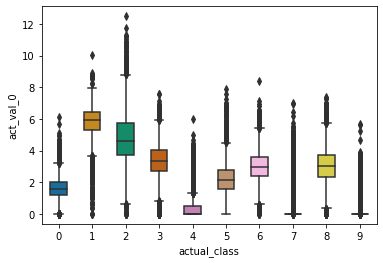

In [ ]:

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class',
                 data=activation_df[['act_val_0','actual_class']],
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})

,actual_class,range_of_act_values
0,0,"[0.0, 6.11]"
1,1,"[0.0, 10.04]"
2,2,"[0.0, 12.49]"
3,3,"[0.0, 7.59]"
4,4,"[0.0, 6.02]"
5,5,"[0.0, 7.92]"
6,6,"[0.0, 8.38]"
7,7,"[0.0, 7.04]"
8,8,"[0.0, 7.41]"
9,9,"[0.0, 5.67]"


In [ ]:
#Get the dataframe of all the pixel values
pixel_data = {'actual_class':y_train}
for k in range(0,128):
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.0,4.0,1.0,9.0,2.0,1.000,3.0,1.0,4.0,3.000,5.0,3.0,6.000,1.0
pix_val_0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix_val_123,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.165,0.0,0.0,0.000,0.0
pix_val_124,0.0,0.0,0.0,0.0,0.0,0.0,0.569,0.0,0.0,0.0,0.463,0.0,0.0,0.000,0.0
pix_val_125,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.859,0.0,0.0,0.090,0.0
pix_val_126,0.0,0.0,0.0,0.0,0.0,0.0,0.827,0.0,0.0,0.0,0.651,0.0,0.0,0.773,0.0


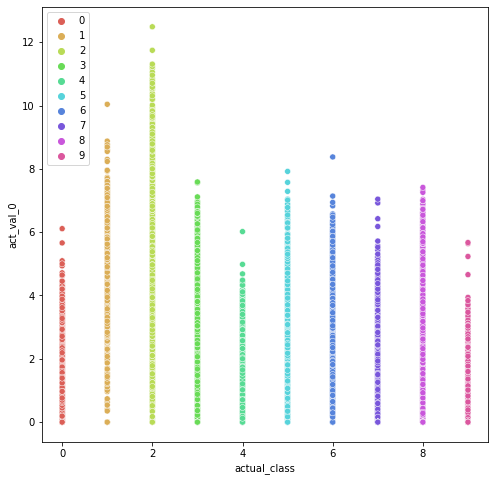

In [ ]:
plt.figure(figsize=(8, 8))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="actual_class", y="act_val_0", hue="actual_class",  palette=color, data = activation_df, legend="full")
plt.legend(loc='upper left');

In [ ]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


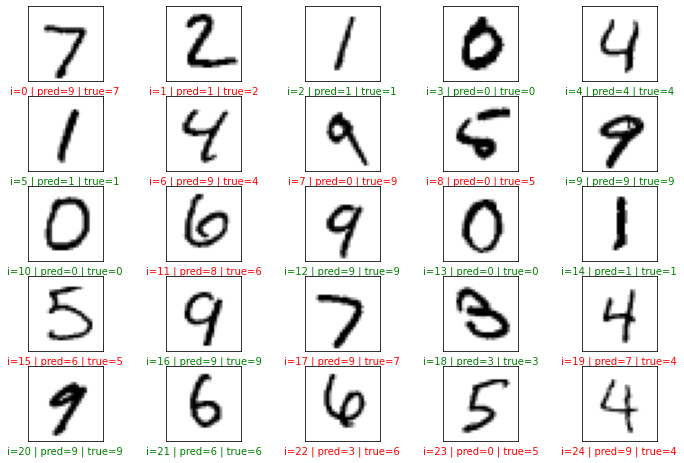

In [ ]:
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

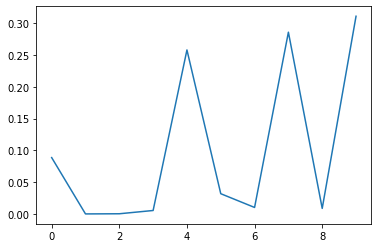

In [ ]:
index = 17

plt.plot(preds[index])
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
losses

[2.015532970428467,
 1.8276335000991821,
 1.7647801637649536,
 1.7308881282806396,
 1.7100064754486084,
 1.6947605609893799,
 1.684720516204834,
 1.677037239074707,
 1.6713101863861084,
 1.6657629013061523,
 1.6616863012313843,
 1.6572768688201904,
 1.6538126468658447,
 1.6507946252822876,
 1.647708773612976,
 1.643352746963501,
 1.6370952129364014,
 1.629610300064087,
 1.623502492904663,
 1.6192866563796997]

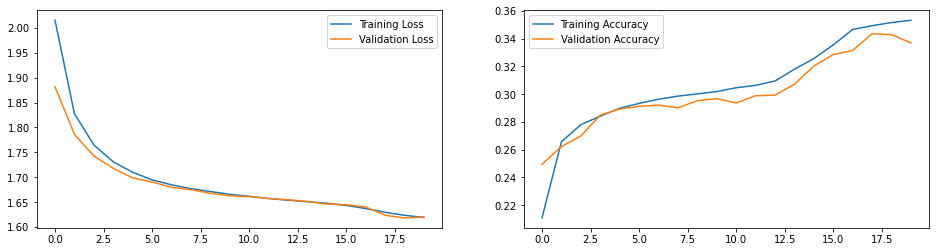

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(x_test_norm), axis=-1)
pred_classes

array([9, 1, 1, ..., 9, 6, 6])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 683,    0,    1,    5,   28,    0,  180,   34,   14,   35],
       [   3, 1061,   50,   12,    0,    0,    3,    0,    6,    0],
       [  36,  603,  149,  110,    1,    0,   57,    1,   72,    3],
       [  58,  136,  179,  191,    6,    0,  241,    8,  166,   25],
       [ 141,    0,    3,    6,   77,    0,   27,  130,    9,  589],
       [ 279,   24,   32,   50,   16,    0,  336,   21,   76,   58],
       [ 155,   51,   86,  143,    6,    0,  326,    7,  179,    5],
       [  73,   15,    8,    5,   16,    0,   28,   25,   12,  846],
       [ 144,   51,   82,  150,    6,    0,  359,   11,  159,   12],
       [  80,    0,    0,    2,   29,    0,   26,   58,    3,  811]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,8.86%,0.00%,0.03%,0.54%,25.80%,3.18%,1.02%,28.59%,0.87%,31.10%
1,0.07%,55.36%,29.37%,6.39%,0.00%,0.45%,3.86%,0.00%,4.50%,0.00%
2,0.33%,39.69%,29.63%,11.62%,0.00%,1.46%,8.16%,0.00%,9.12%,0.00%
3,21.75%,0.87%,2.75%,13.10%,4.12%,19.33%,17.31%,3.12%,16.28%,1.36%
4,18.72%,0.04%,0.20%,2.41%,22.39%,9.03%,4.05%,21.91%,3.56%,17.70%
5,0.08%,54.02%,29.59%,6.80%,0.00%,0.50%,4.17%,0.00%,4.84%,0.00%
6,8.86%,0.00%,0.03%,0.54%,25.80%,3.18%,1.02%,28.59%,0.87%,31.10%
7,22.15%,0.07%,0.36%,3.72%,19.30%,11.87%,5.99%,18.08%,5.33%,13.13%
8,23.97%,0.58%,2.01%,11.17%,6.17%,19.24%,15.35%,4.87%,14.28%,2.35%
9,8.86%,0.00%,0.03%,0.54%,25.80%,3.18%,1.02%,28.59%,0.87%,31.10%


In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 1)

#Experiment 2

In [ ]:
model = Sequential([
    Dense(input_shape=[784], units = 2, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 1570      
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


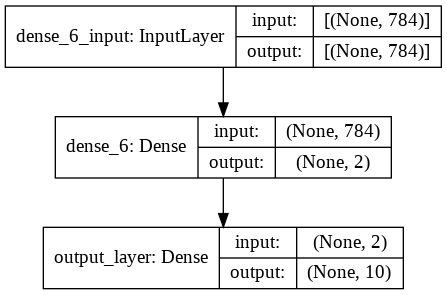

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7114 - accuracy: 0.3575 - val_loss: 1.3750 - val_accuracy: 0.5527
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2693 - accuracy: 0.5652 - val_loss: 1.1581 - val_accuracy: 0.5848
Epoch 3/200
1500/1500 [==============================] - 2s 2ms/step - loss: 1.1590 - accuracy: 0.5774 - val_loss: 1.1021 - val_accuracy: 0.5928
Epoch 4/200
1500/1500 [==============================] - 2s 2ms/step - loss: 1.1190 - accuracy: 0.5987 - val_loss: 1.0706 - val_accuracy: 0.6344
Epoch 5/200
1500/1500 [==============================] - 2s 2ms/step - loss: 1.0903 - accuracy: 0.6299 - val_loss: 1.0398 - val_accuracy: 0.6507
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0678 - accuracy: 0.6418 - val_loss: 1.0238 - val_accuracy: 0.6559
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0500 - accuracy: 0.6512 - val_loss: 1.0092 - val_ac

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.9946 - accuracy: 0.6866
test set accuracy:  68.66000294685364


In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 2)

In [ ]:
output_layer_activations.shape

(60000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 36.451080322265625


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.2385 0.     0.0149 0.2448 0.0083 0.2163 0.1251 0.     0.1516 0.0004]
The sum of the probabilities is (approximately) 1.0


In [ ]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,2):
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.000,2.000,1.0,3.000,1.000,4.000,3.000,5.000,3.000,6.000,1.000
act_val_0,6.289,10.947,3.435,0.396,10.364,0.730,0.0,6.333,0.000,7.158,3.610,9.835,3.178,6.258,0.000
act_val_1,2.380,3.101,6.617,2.614,16.657,0.904,3.2,3.851,2.989,7.619,4.417,5.640,1.341,0.000,2.964


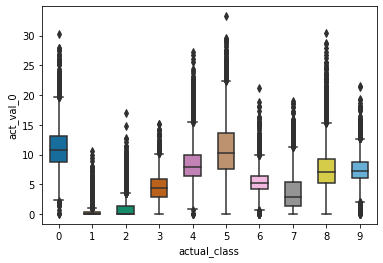

In [ ]:

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class',
                 data=activation_df[['act_val_0','actual_class']],
                 width=0.5,
                 palette="colorblind")

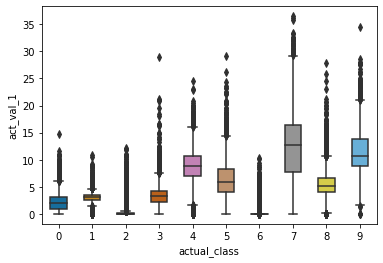

In [ ]:
bplot = sns.boxplot(y='act_val_1', x='actual_class',
                 data=activation_df[['act_val_1','actual_class']],
                 width=0.5,
                 palette="colorblind")

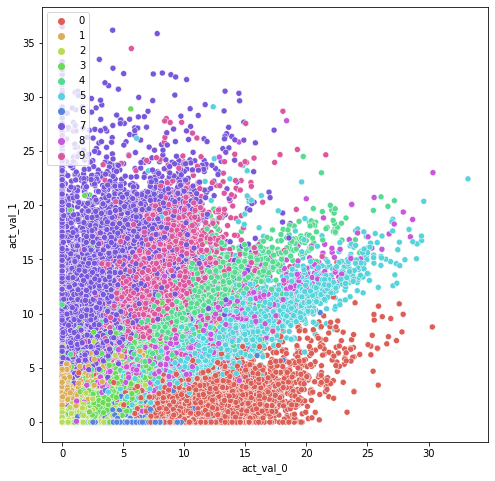

In [ ]:
plt.figure(figsize=(8, 8))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="act_val_0", y="act_val_1", hue="actual_class",  palette=color, data = activation_df, legend="full")
plt.legend(loc='upper left');

In [ ]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


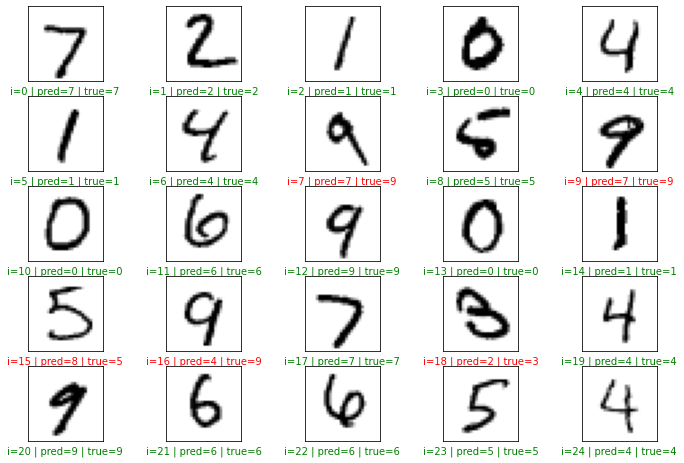

In [ ]:
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

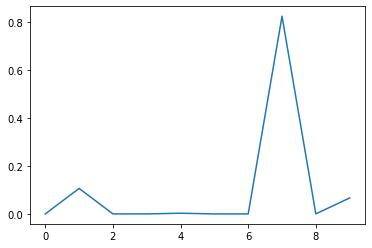

In [ ]:
index = 17

plt.plot(preds[index])
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

In [ ]:
losses

[1.711415410041809,
 1.2692854404449463,
 1.1589813232421875,
 1.1189610958099365,
 1.0903149843215942,
 1.0678044557571411,
 1.0499693155288696,
 1.0378146171569824,
 1.027139663696289,
 1.019432544708252,
 1.0128849744796753,
 1.0060951709747314,
 1.0008697509765625,
 0.9971262812614441,
 0.9932665228843689,
 0.9897252321243286,
 0.986883282661438,
 0.9846038222312927,
 0.9819523096084595]

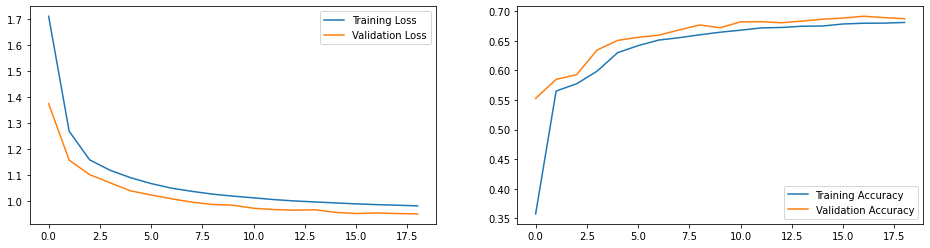

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(x_test_norm), axis=-1)
pred_classes

array([7, 2, 1, ..., 9, 5, 6])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 827,    0,    1,   19,    1,   46,   82,    0,    4,    0],
       [   0, 1061,   26,   37,    0,    1,    2,    7,    0,    1],
       [   8,   40,  826,   74,    3,    4,   66,    6,    2,    3],
       [  22,   37,  109,  545,   42,   75,   58,   24,   94,    4],
       [   2,    0,    4,   38,  693,   25,    5,   27,   54,  134],
       [ 101,    1,   13,   73,   32,  549,   36,    3,   76,    8],
       [  88,    0,   22,   25,    1,    8,  812,    0,    2,    0],
       [   0,   93,   10,   14,   37,    3,    1,  741,    3,  126],
       [  39,   15,    7,  195,  133,  249,   11,   18,  296,   11],
       [   4,    3,    0,   16,  288,   15,    2,  152,   13,  516]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.50%,0.00%,0.00%,0.03%,0.00%,0.00%,95.12%,0.00%,4.35%
1,0.03%,8.74%,81.70%,5.59%,0.05%,0.08%,3.38%,0.05%,0.36%,0.02%
2,0.00%,86.49%,2.92%,3.12%,0.61%,0.03%,0.00%,5.36%,0.47%,1.00%
3,72.17%,0.00%,0.01%,0.13%,0.00%,1.28%,26.30%,0.00%,0.12%,0.00%
4,0.00%,0.09%,0.01%,8.84%,37.64%,2.40%,0.00%,10.34%,15.33%,25.35%
5,0.00%,89.23%,0.79%,1.24%,0.44%,0.01%,0.00%,7.04%,0.21%,1.05%
6,0.00%,0.00%,0.00%,0.70%,59.54%,2.42%,0.00%,1.58%,9.58%,26.18%
7,0.00%,0.30%,0.00%,0.46%,13.83%,0.04%,0.00%,45.23%,0.95%,39.19%
8,1.65%,0.00%,0.00%,0.55%,7.75%,69.49%,0.00%,0.00%,20.40%,0.17%
9,0.00%,0.00%,0.00%,0.00%,0.67%,0.00%,0.00%,56.31%,0.00%,43.02%


In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 2)

#Experiment 3

In [ ]:
model = Sequential([
    Dense(input_shape=[784], units = 256, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


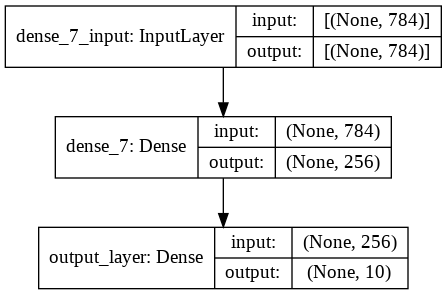

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2454 - accuracy: 0.9280 - val_loss: 0.1316 - val_accuracy: 0.9622
Epoch 2/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1106 - accuracy: 0.9678 - val_loss: 0.1011 - val_accuracy: 0.9697
Epoch 3/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0774 - accuracy: 0.9780 - val_loss: 0.0972 - val_accuracy: 0.9739
Epoch 4/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0606 - accuracy: 0.9827 - val_loss: 0.0964 - val_accuracy: 0.9753
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0494 - accuracy: 0.9862 - val_loss: 0.0998 - val_accuracy: 0.9754
Epoch 6/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0395 - accuracy: 0.9889 - val_loss: 0.1008 - val_accuracy: 0.9758
Epoch 7/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0333 - accuracy: 0.9909 - val_loss: 0.1073 - val_ac

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9788
test set accuracy:  97.87999987602234


In [ ]:
x_test_norm


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_test_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

# Separating out the features
features = [*pixel_data][1:]

In [ ]:
for i in (pixel_df.loc[:, features].values[:1]):
  len(i)

#Experiment 4

In [ ]:
pca = PCA(n_components=158)
principalComponents = pca.fit_transform(x_train_norm)
principalDftrain = pd.DataFrame(data = principalComponents)

In [ ]:
principalDftrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157
0,0.485963,-1.226191,-0.096150,-2.179390,-0.107124,-0.911683,0.917594,0.626690,-1.425566,0.778161,0.774540,-0.996332,-0.445058,2.938481,0.859867,-0.018421,1.294735,1.212383,1.088595,0.652303,0.107974,-0.252334,-0.851661,0.981321,0.181060,0.393484,-1.207889,0.667124,-0.492220,-0.483874,-0.384160,0.135631,0.421540,0.331811,-0.597690,0.787427,0.255879,0.785211,0.618290,-1.410724,...,0.230232,-0.163010,-0.268954,-0.130565,0.228123,0.214075,-0.152991,-0.266895,-0.147683,0.101250,0.303730,-0.165243,-0.524483,0.155593,0.128154,0.160605,0.141908,0.124246,0.331909,0.014316,0.006644,0.331523,0.320405,0.149085,-0.189825,-0.142625,0.031540,-0.265474,-0.017698,-0.126321,-0.164125,-0.059388,0.032226,0.135848,-0.072233,0.107188,0.240432,-0.051152,0.195199,0.265590
1,3.967501,-1.156325,2.338569,-1.806874,-3.244294,-0.713556,-0.176580,-0.411608,0.158603,0.591962,-1.123479,-0.420899,-1.251708,0.356419,-0.932835,-0.635081,-0.212017,0.155646,0.204587,-0.400141,0.825607,-0.332740,-0.006000,0.072098,0.909861,0.842788,0.048242,0.192659,-1.417302,-0.336242,0.136196,-0.341270,0.714477,0.300398,-0.577568,0.352092,-0.265168,-0.065840,0.289139,0.165467,...,0.124769,0.054478,0.147368,-0.000395,-0.243766,0.157653,0.151082,0.017737,0.089266,-0.071289,-0.117390,0.150799,-0.015967,-0.105253,-0.312174,0.015264,0.072853,0.079534,-0.090185,-0.146531,0.021030,-0.026944,0.034338,-0.085023,0.150068,0.045861,-0.058809,-0.282867,-0.118158,0.022785,-0.112896,-0.243088,-0.173612,0.074331,0.137340,0.129176,0.028343,0.089319,0.106594,-0.038229
2,-0.203375,1.537929,-0.739277,2.043239,-1.202749,-0.007224,-3.368865,1.445458,-0.449200,-0.700002,1.766857,-0.623089,0.733289,0.428211,-0.567881,-0.750161,0.665114,-0.479405,-0.036266,-1.703603,-0.241485,-0.015637,0.472182,-0.028426,-0.510043,0.338970,0.687113,0.551908,0.051421,-1.091133,-0.155922,0.425696,-0.231650,-0.314151,0.228416,0.743235,0.731954,-0.728267,0.269270,0.014692,...,0.214589,0.007672,0.172605,-0.408837,0.456747,0.184200,-0.204112,0.096485,0.063993,-0.012395,0.013095,0.228104,-0.126496,0.259318,0.047622,0.197322,-0.273592,-0.653843,0.238353,-0.063229,0.247968,0.387301,-0.237805,0.134714,0.344046,-0.395746,-0.287995,-0.133286,0.012044,0.001950,0.007425,-0.098546,0.205374,0.259292,0.386482,-0.122823,0.092280,0.537322,0.092164,-0.226286
3,-3.133877,-2.381163,1.073118,0.415263,-0.007364,2.743756,-1.857726,-0.263996,1.187138,0.043565,-1.695961,-0.686409,0.956496,0.649751,-0.594918,0.199025,0.040076,0.755543,0.551547,0.518508,-0.254655,-0.487099,0.234747,-0.370039,0.507243,0.052238,-1.080165,0.552506,0.036961,-0.466794,0.041485,-0.258684,-0.309842,-0.444717,0.544097,0.336659,-0.012598,-0.033411,-0.173595,0.274464,...,-0.099186,-0.068754,0.015815,-0.249600,0.127709,0.046521,-0.045721,-0.065057,0.064806,-0.022800,0.080060,-0.031891,-0.066155,0.212725,0.057126,-0.141239,-0.090585,0.111714,-0.109383,-0.060415,-0.086697,-0.284246,-0.006014,0.187623,-0.039722,-0.076040,-0.059722,-0.050777,-0.066475,-0.116487,0.015491,-0.109638,0.098520,0.112397,0.007180,0.219725,0.026568,0.042188,0.043863,0.039157
4,-1.501042,2.864865,0.064100,-0.947808,0.384854,0.169519,-0.359533,-1.590404,0.884276,0.408284,-1.363775,1.802574,-1.004690,-1.232266,0.232620,-1.073235,0.075076,-0.705591,0.256169,-0.980643,-0.026715,-0.266447,0.915298,0.019040,-0.004777,0.322719,-0.734681,0.797030,-0.498482,0.282916,0.287142,0.459209,-0.042429,0.525098,0.556563,-0.143879,-0.103486,1.031247,0.389929,-0.477084,...,0.054569,0.322488,-0.104180,-0.374616,-0.254213,-0.406030,-0.141754,0.080019,-0.059839,-0.020778,0.221936,0.008867,-0.108270,0.080407,0.094335,-0.170602,0.106349,-0.186927,0.065381,0.301746,-0.098793,0.307461,-0.206670,-0.199159,0.067038,-0.105593,0.098189,0.113340,-0.022855,-0.087855,

In [ ]:
pca = PCA(n_components=158)
principalComponents = pca.fit_transform(x_test_norm)
principalDftest = pd.DataFrame(data = principalComponents)

In [ ]:
model = Sequential([
    Dense(input_shape=[158], units = 1, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 159       
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


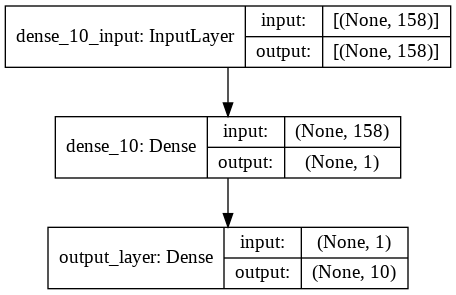

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    principalDftrain
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0686 - accuracy: 0.1988 - val_loss: 1.9346 - val_accuracy: 0.2253
Epoch 2/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.8861 - accuracy: 0.2393 - val_loss: 1.8495 - val_accuracy: 0.2498
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.8262 - accuracy: 0.2557 - val_loss: 1.8082 - val_accuracy: 0.2683
Epoch 4/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7884 - accuracy: 0.2712 - val_loss: 1.7726 - val_accuracy: 0.2783
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7558 - accuracy: 0.2787 - val_loss: 1.7407 - val_accuracy: 0.2817
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7304 - accuracy: 0.2849 - val_loss: 1.7194 - val_accuracy: 0.2882
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7150 - accuracy: 0.2908 - val_loss: 1.7058 - val_ac

In [ ]:
loss, accuracy = model.evaluate(principalDftest, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 5.9795 - accuracy: 0.0412
test set accuracy:  4.1200000792741776


In [ ]:
model = Sequential([
    Dense(input_shape=[158], units = 2, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 318       
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 348
Trainable params: 348
Non-trainable params: 0
_________________________________________________________________


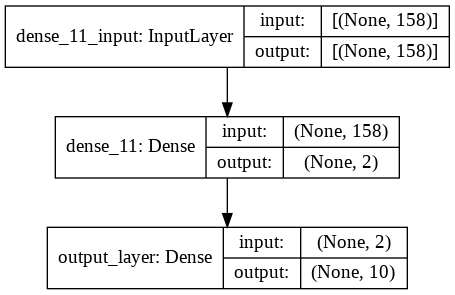

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    principalDftrain
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7931 - accuracy: 0.3219 - val_loss: 1.4711 - val_accuracy: 0.4317
Epoch 2/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.3747 - accuracy: 0.5045 - val_loss: 1.2761 - val_accuracy: 0.5462
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.2381 - accuracy: 0.5546 - val_loss: 1.1824 - val_accuracy: 0.5684
Epoch 4/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1717 - accuracy: 0.5784 - val_loss: 1.1322 - val_accuracy: 0.5972
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1320 - accuracy: 0.5993 - val_loss: 1.0987 - val_accuracy: 0.6143
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1061 - accuracy: 0.6163 - val_loss: 1.0750 - val_accuracy: 0.6269
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0881 - accuracy: 0.6308 - val_loss: 1.0565 - val_ac

In [ ]:
loss, accuracy = model.evaluate(principalDftest, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 4.4057 - accuracy: 0.1866
test set accuracy:  18.6599999666214


In [ ]:
pixel_df[['actual_class']]

,actual_class
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [ ]:
data=tf.keras.datasets.mnist.load_data()

In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
x_train_norm.shape

(60000, 784)

In [ ]:
x_test_norm.shape

(10000, 784)

In [ ]:
allData=np.concatenate((x_train_norm, x_test_norm), axis=0)

In [ ]:
pca = PCA(n_components=158)
principalComponents = pca.fit_transform(allData)
principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
principalDftrain2=principalDf[:60000]
principalDftest2=principalDf[60000:]

In [ ]:
principalDf[60000:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157
60000,-1.348954,2.899487,-0.169327,-1.169145,-1.945318,1.039794,1.557306,1.975658,-1.421119,-0.777569,0.741315,-0.394652,0.091079,-0.902635,0.491142,-0.267146,1.170985,0.942812,0.243375,0.246373,-0.187919,1.013694,0.074680,-0.380395,-0.461916,-0.147010,0.520382,-0.157110,0.042539,-0.830743,0.167222,-1.209208,0.312505,-0.598642,-0.165723,0.637897,-0.336805,-0.362003,0.023545,0.448431,...,0.189234,-0.290793,-0.007324,0.248766,-0.299522,-0.093316,-0.152207,-0.067108,0.054140,-0.116874,0.011344,0.094113,-0.179359,-0.167056,0.174960,0.107506,-0.021402,0.262389,-0.043341,-0.011608,0.193956,-0.135674,0.285190,0.031450,-0.039179,0.028990,0.278694,-0.080859,0.151462,-0.031414,-0.160190,0.067822,-0.106317,-0.075946,-0.084367,-0.099918,0.169510,0.031960,0.037234,-0.178734
60001,0.100428,-3.766919,-0.531217,1.565244,-0.269164,-1.844641,1.006156,0.879591,0.638667,-0.365346,0.728873,0.175416,-0.127388,-3.259237,-0.081013,1.789685,2.240057,-0.139216,0.071312,-0.319879,1.651611,1.102529,0.203845,0.879457,-0.624725,-1.108560,0.140483,-0.019650,0.144151,-0.241953,0.398169,0.451110,-0.087095,0.246615,0.433532,-0.184384,-0.143341,0.377340,0.011315,-0.175145,...,-0.067737,-0.175422,-0.371918,0.022181,0.207391,-0.212929,0.067364,-0.258118,-0.184197,-0.002992,0.002777,0.134037,0.181349,-0.136975,0.262561,-0.344824,-0.017306,-0.048788,0.378318,-0.156438,-0.259005,0.376541,-0.055497,-0.112183,-0.090121,-0.164482,0.227319,0.255126,0.254248,0.119136,0.217719,0.189642,-0.071938,-0.186791,-0.007951,0.101257,-0.079074,-0.164587,-0.177038,-0.500495
60002,-3.709607,-1.705314,0.385710,1.073335,-2.055160,0.380782,-0.092538,-0.463681,0.370965,-0.537787,-0.228468,-0.320189,-0.713115,1.193194,1.185827,0.164658,0.064038,-0.142358,-0.290029,-0.113421,0.068483,0.269816,0.132436,0.251220,0.017644,0.047895,0.785216,-0.152759,0.026348,-0.802092,-0.327983,-0.230697,0.307495,-0.204558,-0.390337,-0.552953,0.402538,-0.207223,0.028698,-0.244103,...,-0.115106,-0.060064,0.092737,0.073624,0.063970,0.096416,0.271546,0.082880,0.348955,0.071240,-0.073408,0.025036,0.127444,-0.125935,-0.074928,-0.059760,0.122746,0.060916,0.004471,-0.000838,0.004762,0.053320,-0.167898,-0.060463,-0.003094,-0.045791,-0.014932,0.146776,-0.198980,0.129531,0.069496,0.069297,0.058571,0.133483,0.020363,-0.078993,-0.015382,0.061348,0.189383,0.026025
60003,4.856924,0.431189,0.939707,-0.480313,-0.886618,-1.862391,2.696966,0.330172,0.087047,-0.218124,-2.017414,-0.964963,-0.460434,-0.511382,1.471473,-0.143223,-0.534196,0.778165,-0.685119,-1.384904,0.286573,0.644073,0.371477,0.261550,-0.025550,1.225291,-0.612874,0.656997,-0.865606,0.601967,-0.677590,-0.100723,-0.247203,-0.387739,-0.083049,0.165782,-0.847143,-0.337184,-0.002650,-0.764692,...,-0.045161,-0.238637,-0.016630,-0.190873,-0.205297,-0.220658,-0.102117,-0.061026,0.237948,-0.217440,-0.293444,-0.027779,-0.090963,-0.011531,-0.087904,-0.181881,0.048190,0.022007,-0.046122,0.156015,0.111451,-0.094865,-0.170611,-0.059425,0.323197,0.064507,-0.010949,-0.192921,0.226965,0.177329,-0.013255,-0.025967,-0.069722,-0.067258,0.024468,0.014112,0.019969,-0.057790,0.139165,0.114923
60004,0.712731,2.822324,-1.042630,2.527516,-0.565356,0.901395,-1.958654,1.005385,-1.243879,0.706494,0.581473,-0.842020,0.947337,0.454798,1.159842,1.233690,-0.967013,-0.593453,-0.451322,-0.196557,0.191111,0.384589,-0.393963,1.518397,-1.290837,-0.368763,-0.681943,0.082795,0.368299,-0.461884,-0.629538,-0.167863,-0.121560,0.451097,-0.272595,-0.210603,-0.232699,-0.110275,-0.111968,0.467140,...,-0.041383,-0.367329,0.006404,0.031959,-0.086470,0.216690,-0.056180,0.064662,-0.289410,-0.034819,-0.303404,-0.065887,-0.076906,-0.097325,-0.079337,-0.097848,-0.295751,0.119606,-0.354462,0.171453,0.207891,-0.289019,0.068342,0.032836,-0.066431,0.

In [ ]:
model = Sequential([
    Dense(input_shape=[158], units = 1, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 159       
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


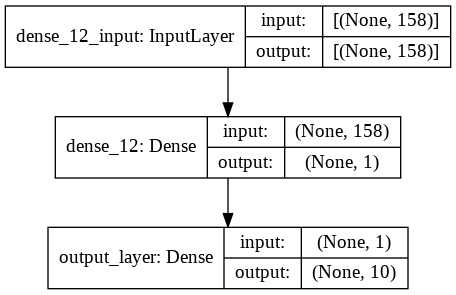

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    principalDftrain2
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0714 - accuracy: 0.1900 - val_loss: 1.9160 - val_accuracy: 0.2233
Epoch 2/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.8734 - accuracy: 0.2385 - val_loss: 1.8303 - val_accuracy: 0.2347
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7974 - accuracy: 0.2629 - val_loss: 1.7445 - val_accuracy: 0.2741
Epoch 4/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7253 - accuracy: 0.2817 - val_loss: 1.6904 - val_accuracy: 0.2811
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6889 - accuracy: 0.2876 - val_loss: 1.6641 - val_accuracy: 0.2822
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6687 - accuracy: 0.2911 - val_loss: 1.6486 - val_accuracy: 0.2822
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6554 - accuracy: 0.3055 - val_loss: 1.6371 - val_ac

In [ ]:
loss, accuracy = model.evaluate(principalDftest2, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 1.5962 - accuracy: 0.3617
test set accuracy:  36.169999837875366


In [ ]:
model = Sequential([
    Dense(input_shape=[158], units = 2, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2)                 318       
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 348
Trainable params: 348
Non-trainable params: 0
_________________________________________________________________


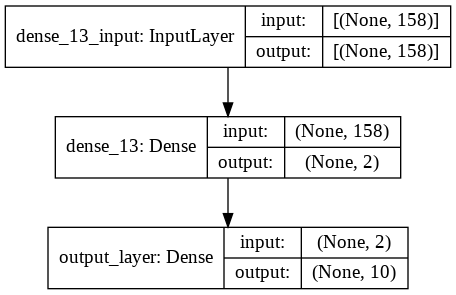

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    principalDftrain2
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7831 - accuracy: 0.3384 - val_loss: 1.4569 - val_accuracy: 0.4398
Epoch 2/200
1500/1500 [==============================] - 2s 2ms/step - loss: 1.3695 - accuracy: 0.4842 - val_loss: 1.2768 - val_accuracy: 0.5077
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.2461 - accuracy: 0.5370 - val_loss: 1.1871 - val_accuracy: 0.5535
Epoch 4/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1790 - accuracy: 0.5706 - val_loss: 1.1339 - val_accuracy: 0.5832
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1418 - accuracy: 0.5880 - val_loss: 1.1037 - val_accuracy: 0.6012
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1160 - accuracy: 0.6073 - val_loss: 1.0768 - val_accuracy: 0.6220
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0930 - accuracy: 0.6308 - val_loss: 1.0517 - val_ac

In [ ]:
loss, accuracy = model.evaluate(principalDftest2, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 1.0015 - accuracy: 0.6689
test set accuracy:  66.89000129699707


In [ ]:
model = Sequential([
    Dense(input_shape=[158], units = 128, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               20352     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 21,642
Trainable params: 21,642
Non-trainable params: 0
_________________________________________________________________


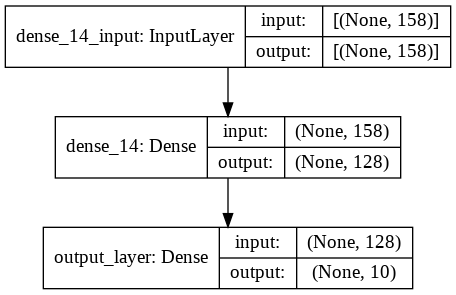

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    principalDftrain2
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.9079 - val_loss: 0.1560 - val_accuracy: 0.9546
Epoch 2/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1263 - accuracy: 0.9626 - val_loss: 0.1155 - val_accuracy: 0.9661
Epoch 3/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0848 - accuracy: 0.9754 - val_loss: 0.1005 - val_accuracy: 0.9720
Epoch 4/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0618 - accuracy: 0.9826 - val_loss: 0.0935 - val_accuracy: 0.9746
Epoch 5/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.0927 - val_accuracy: 0.9753
Epoch 6/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0357 - accuracy: 0.9908 - val_loss: 0.0917 - val_accuracy: 0.9758
Epoch 7/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0928 - val_ac

In [ ]:
loss, accuracy = model.evaluate(principalDftest2, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.0978 - accuracy: 0.9774
test set accuracy:  97.7400004863739


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#Experiment 5

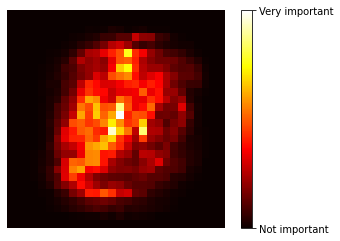

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [ ]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [ ]:
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape

((60000, 70), (10000, 70))

In [ ]:
train_images_sm

array([[0.88235295, 0.        , 0.27450982, ..., 0.        , 0.04313726, 0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.14509805, 0.64705884],
       [0.        , 0.7764706 , 0.        , ..., 0.09019608, 0.        , 0.        ],
       ...,
       [0.5764706 , 0.        , 0.        , ..., 0.        , 0.99215686, 0.3137255 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ],
       [0.00784314, 0.7058824 , 0.        , ..., 0.        , 0.        , 0.        ]], dtype=float32)

In [ ]:
test_images_sm

array([[0.        , 0.        , 0.        , ..., 0.3254902 , 0.99607843, 0.        ],
       [0.13725491, 0.04705882, 0.62352943, ..., 0.        , 0.        , 0.        ],
       [0.92941177, 0.67058825, 0.54901963, ..., 0.        , 0.03921569, 0.        ],
       ...,
       [0.7607843 , 0.99607843, 0.04313726, ..., 0.99607843, 0.9019608 , 0.99607843],
       [0.52156866, 0.99607843, 0.6627451 , ..., 0.8666667 , 0.14509805, 0.        ],
       [0.        , 0.61960787, 0.        , ..., 0.        , 0.        , 0.98039216]], dtype=float32)

In [ ]:
def pair(n,size):
    x = n//size
    y = n%size
    return x,y

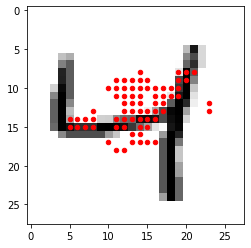

In [ ]:
plt.imshow(x_train_norm[2].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [ ]:
model = Sequential([
    Dense(input_shape=[70], units = 1, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 71        
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


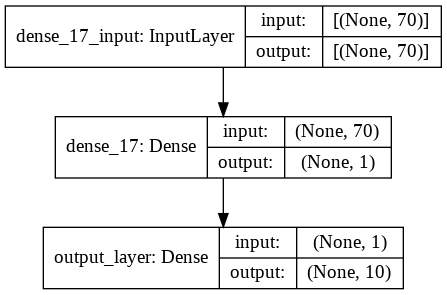

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images_sm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7312 - accuracy: 0.2994 - val_loss: 1.7224 - val_accuracy: 0.3004
Epoch 2/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7291 - accuracy: 0.2968 - val_loss: 1.7185 - val_accuracy: 0.2975
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7274 - accuracy: 0.2995 - val_loss: 1.7183 - val_accuracy: 0.3011
Epoch 4/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7257 - accuracy: 0.2974 - val_loss: 1.7160 - val_accuracy: 0.3038
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7245 - accuracy: 0.2989 - val_loss: 1.7154 - val_accuracy: 0.2937
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7233 - accuracy: 0.2971 - val_loss: 1.7151 - val_accuracy: 0.3018


In [ ]:
loss, accuracy = model.evaluate(test_images_sm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 1.7228 - accuracy: 0.3094
test set accuracy:  30.939999222755432


In [ ]:
model = Sequential([
    Dense(input_shape=[70], units = 2, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 2)                 142       
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


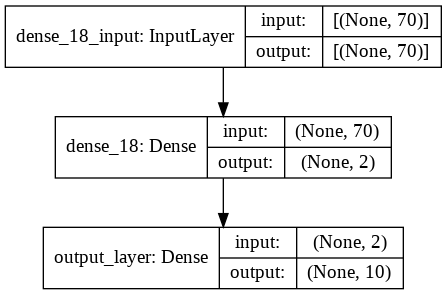

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images_sm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0188 - accuracy: 0.2725 - val_loss: 1.7259 - val_accuracy: 0.3991
Epoch 2/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6098 - accuracy: 0.4541 - val_loss: 1.5166 - val_accuracy: 0.4907
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.4804 - accuracy: 0.4832 - val_loss: 1.4291 - val_accuracy: 0.4893
Epoch 4/200
1500/1500 [==============================] - 2s 1ms/step - loss: 1.4218 - accuracy: 0.4822 - val_loss: 1.3871 - val_accuracy: 0.4893


In [ ]:
loss, accuracy = model.evaluate(test_images_sm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 1.3850 - accuracy: 0.4817
test set accuracy:  48.170000314712524


In [ ]:
model = Sequential([
    Dense(input_shape=[70], units = 128, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               9088      
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 10,378
Trainable params: 10,378
Non-trainable params: 0
_________________________________________________________________


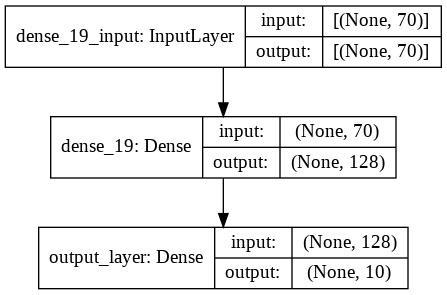

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images_sm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6139 - accuracy: 0.8167 - val_loss: 0.4193 - val_accuracy: 0.8727
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3987 - accuracy: 0.8800 - val_loss: 0.3441 - val_accuracy: 0.8988
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3337 - accuracy: 0.9001 - val_loss: 0.3022 - val_accuracy: 0.9090
Epoch 4/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2934 - accuracy: 0.9108 - val_loss: 0.2745 - val_accuracy: 0.9190
Epoch 5/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2656 - accuracy: 0.9189 - val_loss: 0.2537 - val_accuracy: 0.9256
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2468 - accuracy: 0.9254 - val_loss: 0.2446 - val_accuracy: 0.9283
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2324 - accuracy: 0.9299 - val_loss: 0.2359 - val_ac

In [ ]:
loss, accuracy = model.evaluate(test_images_sm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.2169 - accuracy: 0.9394
test set accuracy:  93.94000172615051


In [ ]:
model = Sequential([
    Dense(input_shape=[70], units = 256, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               18176     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 20,746
Trainable params: 20,746
Non-trainable params: 0
_________________________________________________________________


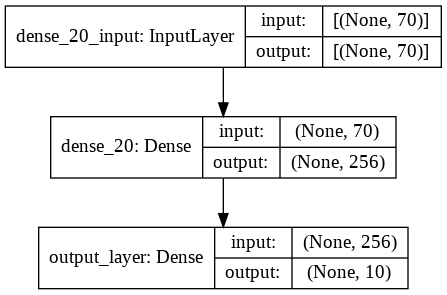

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images_sm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5453 - accuracy: 0.8379 - val_loss: 0.3557 - val_accuracy: 0.8946
Epoch 2/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3408 - accuracy: 0.8963 - val_loss: 0.2800 - val_accuracy: 0.9182
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.9154 - val_loss: 0.2481 - val_accuracy: 0.9248
Epoch 4/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2421 - accuracy: 0.9258 - val_loss: 0.2275 - val_accuracy: 0.9298
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2206 - accuracy: 0.9322 - val_loss: 0.2285 - val_accuracy: 0.9292
Epoch 6/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2037 - accuracy: 0.9384 - val_loss: 0.2262 - val_accuracy: 0.9312
Epoch 7/200
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1927 - accuracy: 0.9417 - val_loss: 0.2097 - val_ac

In [ ]:
loss, accuracy = model.evaluate(test_images_sm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.2066 - accuracy: 0.9402
test set accuracy:  94.01999711990356
